# EHB328 - Birinci Odev Ikinci Kisim
Erkan Giray Arat

## Icindekiler

- [SORU 2 EK KISIMLARI](#2.e.1)
- [&nbsp;&nbsp;2.e.1 Gauss Dagilimina Gore Veriyi Olusturmak](#2.e.1)
- [&nbsp;&nbsp;2.e.2 Ayirt Edici Fonksiyonu Tanimlamak](#2.e.2)
- [&nbsp;&nbsp;&nbsp;2.e.2.1 discriminant_fnc() Tanimlamasi](#2.e.2)
- [&nbsp;&nbsp;2.e.3 Siniflandirici Tanimlamak](#2.e.3)
- [&nbsp;&nbsp;2.e.4 Performans Raporlama](#2.e.4)
- [SORU 2 ILK SORULAR](#2.a)
- [&nbsp;&nbsp;2.a Sinif 1 ve 2 Icin Ayirt Edici Fonksiyonlar](#2.a)
- [&nbsp;&nbsp;2.b Karar Siniri Denklemi](#2.b)
- [&nbsp;&nbsp;2.c Yapilan Ogreticili Siniflandirici Midir?](#2.c)
- [&nbsp;&nbsp;2.d Siniflandirici Dogrusal Midir?](#2.d)

<a name="2.e.1"></a>
## Gauss Dagilimina Gore Veriyi Olusturmak

In [22]:
import numpy as np
import math  as mt
from matplotlib import pyplot as plt

In [2]:
def GenerateGaussianData(N,aves,covs):
    #gets number of features
    #used in the rest of the code
    no_of_features=np.size(aves)
    
    #av_holder=np.zeros(no_of_features)
    # holds averages for features 
    #for i in loc:
    #    av_holder=i
    #since I decided to do each class separately
    #I removed this part
    
    
    std_dev_holder=np.zeros(no_of_features)
    #holds standard deviations for features 
    for i in range(no_of_features):
        std_dev_holder[i]=mt.sqrt(covs[i,i])
        
    #N sample size specified
    #samples from Gaussian distribution
    samples=np.zeros((N,no_of_features))
    for i in range(N):
        for l in range(no_of_features):
            samples[i,l]=np.random.normal(aves[l],std_dev_holder[l])
            
    return samples

In [3]:
#Distribution Parameters for first Class
mean_c1=np.array([3,2])
cov_c1=np.array([[0.5,0],[0,0.5]])

In [4]:
#we want a hundred samples
N=100

In [5]:
#sample the Gaussian distribution 
#hundred times for the first class
samples_c1=GenerateGaussianData(N,mean_c1,cov_c1)
#print(samples_c1)

In [6]:
#Distribution Parameters for second class
mean_c2=np.array([5,4])
cov_c2=np.array([[1,0],[0,1]])

In [7]:
#Sample Gaussian for the second class
samples_c2=GenerateGaussianData(N,mean_c2,cov_c2)
#print(samples_c2)

<a name="2.e.2"></a>
## Ayirt Edici Fonksiyonu Tanimlamak

P(C1)=P(C2) olarak siniflarin gelme olasiliklari birbirlerine esittir diye varsaydim.

In [8]:
#taking each class to have equal probabilities
P_C=0.5

Her iki sinifin da kovaryans matrislerinin kosegen disi elemanlarini sifir oldugu icin ders notlarindaki ayirt edici fonksiyonu (discriminant function) kullandim. 

In [9]:
def discriminant_fnc(data_2_predict,ave,cov_matrix,N,P_C):
    # data to predict, expected: 1x2 real number array
    # new data to classify
    # two elements for each feature
    
    # ave, expected: 1x2 real number array
    # expecting input "mean_cx" variables
    # distribution parameter
    
    # cov_matrix, expected: 2x2 real number array
    # expecting input "cov_cx" variables
    # distribution parameter
    
    # calculate inverse of cov_matrix
    inv_cov=np.linalg.inv(cov_matrix)
    
    # calculate x - averages, 
    # operation: 1x2 - 1x2, result: 1x2
    temp = data_2_predict - ave
    
    # calculate transpose of x - averages
    # result : 2x1
    transposed_temp = np.reshape(temp,(2,1))
    
    # calculate x . cov^-1
    dot_temp = np.dot( temp , inv_cov )
    # calculate (x . cov^-1) . xT
    dot_temp = np.dot( dot_temp, transposed_temp )
    # calculate -1/2 * (x-av) . cov^-1 . (x-av)^T
    dot_pdt = -1/2 * dot_temp
    
    # calculate -1/2*N*ln|cov|
    # log of covariance matrix times Number of examples
    #log_cov = (-1/2)*N*(np.log(cov_matrix))
    # not sure if abs must be used
    
    # calculate log(Pi),
    # log of prior probability of class
    log_prob = np.log(P_C)
    
    # I am not sure about incuding log_cov
    #g = dot_pdt + log_cov + log_prob
    
    g = dot_pdt + log_prob
    
    return g

<a name="2.e.2.1"></a>
### discriminant_fnc() Tanimlamasi
<b>discriminant_fnc() parametreleri:</b>
<br><i>&emsp;data_2_predict:</i><br>
&emsp;&ensp;siniflandirmasi yapilacak veri vektoru
<br><i>&emsp;ave:</i><br>
&emsp;&ensp;ozniteliklere ait dagilimin ortalama vektoru
<br><i>&emsp;cov_matrix:</i><br>
&emsp;&ensp;ozniteliklere ait dagilimin ortalama vektoru
<br><i>&emsp;N:</i><br>
&emsp;&ensp;ornek sayisi (example)
<br><i>&emsp;P_C:</i><br>
&emsp;&ensp;siniflara ait onsel olasilik, P(Ci)
<br><br><b>discriminant_fnc() aciklamasi:</b>
Mevucut olan siniflardan birine ait dagilim degerleri girilir.
O sinifa ait ayirt edici fonksiyonun degeri girilen oznitelik vektorune gore hesaplanir.
<br><br><b>kullanilan fonksiyonlar:</b>
<br><i>&emsp;np.linalg.inv():</i> bir matrisin eleman tersini elde eder.
<br><i>&emsp;np.reshape():</i> ic carpimda kullanilmak uzere verilen vektorun<br>&emsp;transpozunu elde eder.
<br><i>&emsp;np.dot():</i> GPU'dan yararlanarak ic carpim islemini gerceklestirir.
<br><i>&emsp;np.log():</i> giris uzerinde dogal logaritma islemini gerceklestirir.
    

<b>Not:</b> Kovaryans matrisleri birbirlerine esit olmadigi icin bir sonraki paragrafta ekledigim Vikipedi baglantilarindaki fonksiyonlari kullanmam gerektigini dusunmustum. Fakat o sayfalarda da bahsettigi uzere asil yapilan islem sonsal olasik dagilimi (P(C|x)) kullanilarak secim yapilmasi. Bu sebeple ders notlarindaki fonksiyonu kullanarak hata yapmadigimi dusunuyorum.

Quadratic discriminant analysis (QDA) is closely related to linear discriminant analysis (LDA), where it is assumed that the measurements from each class are normally distributed. Unlike LDA however, in QDA there is no assumption that the covariance of each of the classes is identical. When the normality assumption is true, the best possible test for the hypothesis that a given measurement is from a given class is the likelihood ratio test.
https://en.wikipedia.org/wiki/Linear_discriminant_analysis
https://en.wikipedia.org/wiki/Quadratic_classifier#Quadratic_discriminant_analysis

<a name="2.e.3"></a>
## Siniflandirici Tanimlamak

Verilen yeni verinin hangi sinifa ait oldugunu tahmin etmek icin olabilirlik orani (likelihood test) kullanilir.

Siniflandiriciyi yapmak icin karar verici fonksiyon ayni veriyi kullanarak iki sinifa da ait olan ayirt edici fonksiyonlari ayri ayri cagirir. Cikan sonuclari karsilastirarak hangi sinifa ait olduguna karar verir.

In [10]:
def Classify(x,ave_matrix,cov_matrix,N,P_matrix):
    
    # x, expected: 1x2
    # can be 1x(number of features)
    
    # ave_matrix, expected: 2x2
    # can be (number of classes)x(number of features)
    
    # cov_matrix, expected: 4x2
    # can be ((number of classes)*(number of features))x(number of features)
    
    # N, expected: 100
    # can be (number of examples)
    
    # P_matrix, expected: 1x2
    # can be 1x(number of classes)
    # definition: matrix of priori probabilities of each class
    
    # get number of classes
    n_class=np.size(ave_matrix,1)
    
    # get number of features
    n_features=np.size(ave_matrix,0)
    
    # create array to hold g data
    # (number of examples) x (number of classes)
    g = np.zeros((1,n_class))
    
    # loop for finding predictions for each class
    for i in range(n_class):
        g[0,i]=discriminant_fnc(x, ave_matrix[i, :], cov_matrix[  (0+n_features*i): (n_features+n_features*i), : ], N, P_matrix[0,i])
        
    # define temporary max and update it
    temp_max = - mt.inf
    keep_class=0
    # loop to find max
    for i in range(n_class):
        
        temp_g=float(g[0,i])
        #temp_g=temp_g.item()
        #temp_g=abs(temp_g)
        
        # if g is bigger, update max
        # keep class number
        if temp_g >temp_max:
            temp_max=temp_g
            keep_class=i
            
        # else, keep the previous max
        else:
            temp_max=temp_max
            
    # return the prediction
    return keep_class

Ilk once odevde verilen dagilimlarin parametreleri tanimlanir.

In [11]:
# Define attributes of the distributions.
N=100
ave_matrix=np.array([[3,2],[5,4]])
cov_matrix=np.array([[.5,0],[0,.5],[1,0],[0,1]])
# priori Probabilities of classes taken to be equal
P_c=np.array([[.5,.5]])

Sonrasinda en basta Gauss dagilimindan orneklenerek uretilen "samples" verisinin her biri icin siniflandirici fonksiyonu cagirilir. Boylece her verinin siniflandirma tahmini yapilir.

In [33]:
# hold the predictions

prediction_c1 = np.zeros(N)

# do the classification
# to input only one line of the sample, get "samples_c1[i,:]""
for i in range(N):
    prediction_c1[i] = Classify(samples_c1[i,:],ave_matrix,cov_matrix,N,P_c)
    #print(prediction_holder)
    
# print description
print('ONLY the first 10 predictions are printed so that output is not too long')
print('These are the predictions for the samples from the distribution of the first class:')
# print predictions
for i in range(int((np.size(prediction_c1))/10)):
    print('The ', (i+1), '. example is predicted to belong to', (1+int(prediction_c1[i])),'. class.')

ONLY the first 10 predictions are printed so that output is not too long
These are the predictions for the samples from the distribution of the first class:
The  1 . example is predicted to belong to 1 . class.
The  2 . example is predicted to belong to 1 . class.
The  3 . example is predicted to belong to 1 . class.
The  4 . example is predicted to belong to 1 . class.
The  5 . example is predicted to belong to 1 . class.
The  6 . example is predicted to belong to 1 . class.
The  7 . example is predicted to belong to 1 . class.
The  8 . example is predicted to belong to 1 . class.
The  9 . example is predicted to belong to 1 . class.
The  10 . example is predicted to belong to 1 . class.


In [34]:
# hold the predictions

prediction_c2 = np.zeros(N)

#do the classification
for i in range(N):
    prediction_c2[i] = Classify(samples_c2[i,:],ave_matrix,cov_matrix,N,P_c)
    #print(prediction_holder)
    
# print description
print('These are the predictions for the samples from the distribution of the second class:')
# print predictions
for i in range(int((np.size(prediction_c2))/10)):
    print('The ', (i+1), '. example is predicted to belong to', (1+int(prediction_c2[i])),'. class.')

These are the predictions for the samples from the distribution of the second class:
The  1 . example is predicted to belong to 2 . class.
The  2 . example is predicted to belong to 2 . class.
The  3 . example is predicted to belong to 2 . class.
The  4 . example is predicted to belong to 2 . class.
The  5 . example is predicted to belong to 2 . class.
The  6 . example is predicted to belong to 2 . class.
The  7 . example is predicted to belong to 2 . class.
The  8 . example is predicted to belong to 2 . class.
The  9 . example is predicted to belong to 2 . class.
The  10 . example is predicted to belong to 2 . class.


Fazla veri basilmamasi icin 10 tane veri basildi.

Her bir sinifa ait Gauss dagilimlarindan orneklenen x vektorleri icin tahmin siniflandirmalar yapildi. Ilk basilan kisimda birinci sinifa ait orneklerin tahminleri yapildi. 10 tane basilmasina ragmen cogunlukla dogru tahminler yapildigi goruluyor. Yapilan butun tahminler basildiginda, 100'e 4 hata orani gibi hata oranlari karsimiza cikiyor.

<a name="2.e.4"></a>
## Performans Raporlama

Odevdeki tanima gore karistirma matrisi seklinde raporlamak icin bazi olaylar tanimlayip teshis etmek gerekiyor.

t_a: <b>sinif 1'e</b> atfeden <b>dogru</b> tahmin sayisi<br>
t_b: <b>sinif 2'ye</b> atfeden <b>yanlis</b> tahmin sayisi<br>
t_c: <b>sinif 1'e</b> atfeden <b>yanlis</b> tahmin sayisi<br>
t_d: <b>sinif 2'ye</b> atfeden <b>dogru</b> tahmin sayisi<br>

In [40]:
# define holders for number of correct and wrong predictions
t_a=0;t_b=0;t_c=0;t_d=0;

In [41]:
for i in range(np.size(prediction_c1)):
    # number of incorrect predictions of class 2
    if int(prediction_c1[i]) != 0 :
        t_b=t_b+1
    # number of correct predictions of class 1
    if int(prediction_c1[i]) == 0 :
        t_a=t_a+1

In [42]:
for i in range(np.size(prediction_c2)):
    # number of incorrect predictions of class 1
    if int(prediction_c2[i]) != 1 :
        t_c=t_c+1
    # number of correct predictions of class 2
    if int(prediction_c2[i]) == 1 :
        t_d=t_d+1

Pasta dilimi grafigi.

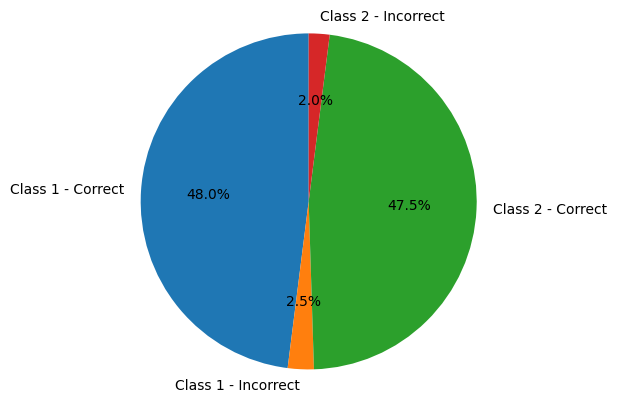

In [44]:
# labels for truthful and deceitful estimations
labels='Class 1 - Correct','Class 1 - Incorrect', 'Class 2 - Correct', 'Class 2 - Incorrect'
# sizes of each estimation
sizes = [t_a,t_c,t_d,t_b]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<a name="2.a"></a>
## Sinif 1 ve 2 Icin Ayirt Edici Fonksiyonlar

Iki sinifa da ait ayirt edici fonksiyon denklemi asagidaki gibi tanimlanmistir. Kodlama bolumunde bu denklemlerin gerceklemesi yapildi.

$$
g_{1}(x)=-\frac{1}{2}(x-\mu_{1})^{T}\sigma _{1}^{-2}(x-\mu_{1})+log(P_{1})
$$

$$
g_{2}(x)=-\frac{1}{2}(x-\mu_{2})^{T}\sigma _{2}^{-2}(x-\mu_{2})+log(P_{2})
$$

<a name="2.b"></a>
## Karar Siniri Denklemi

Kodlama kisminda verilerin hangi sinifa ait oldugunun tahmini $g_{1}(x) \gtrless  g_{2}(x)$ karsilastirmasini yaparak yapildi. Degerlendirilen ornegin ayirt edici fonksiyonlarindan hangisinin sonucu daha buyukse o sinifa dahil edildi.

Karar sinir denklemi ise ayirt edici fonksiyonun daha buyuk ya da kucuk oldugu bir degerin belirlenmesiyle elde edilir. $g_{1}(x) \gtrless T$, ayirt edici fonksiyonun belirli bir esik degeri T'den daha buyuk veya kucuk olmasina gore siniflandirma yapilir.<br> Karar sinir denklemi ise $g_{1}(x)=T$ olur.

$$
g_{1}^{-1}g_{1}(x)=g_{1}^{-1}(T)
$$

$$
x=g_{1}^{-1}(T)
$$

Karar bolgesi noktasinda, karar bolgesinde, ayirt edici fonksiyon hala muallakta kalir. Yani ayirt edici fonksiyonun tersi, karar bolgesi denklemidir, cunku tersi oldugunda bir karar verilmez ve $f^{-1}f(x)=x$

Uyguladigimiz siniflandirici tasarimindaki islemlerdeki diskriminant fonksiyonunun yaptigi isi temsil etmek uzere $\overrightarrow{w}$ belirlersek, ayirt edici fonksiyonun girisi olarak aldigimiz vektoru de $\overrightarrow{x}$ olarak gosterirsek, o zaman ayirt edici fonksiyonun yaptigi is:<br><center>$\overrightarrow{w}\cdot\overrightarrow{x}$</center><br>olarak ifade edilebilir. $\overrightarrow{w}$ degeri $\overrightarrow{x}$ degeri uzerine ic carpim ile etkileyerek onu donusturur. Bu donusumun bir skaler $c$'den buyuk olup olmadigina bakilarak $x$'in hangi sinifa ait oldugu belirlenir. Oyleyse $c$ karar siniri sabitidir (treshold constant, yani oncesinin T'si).

$$
{\vec {w}}=\Sigma ^{-1}({\vec {\mu }}_{1}-{\vec {\mu }}_{0})
$$

$$
c={\vec {w}}\cdot {\frac {1}{2}}({\vec {\mu }}_{1}+{\vec {\mu }}_{0})
$$

<a name="2.c"></a>
## Yapilan Ogreticili Siniflandirici Midir?

Evet, ogreticili siniflandirmadir. Bunun sebebi kullandigimiz verilerin etiketli (labelled) olmasidir. Elimizde sinif 1 ve sinif 2 vardi ve bastan beri bunlari kullanarak siniflandiricilari olusturduk. Buna zit olarak ogreticili olmayan (unsupervised) algoritmalarda sinif etiketleri olmaz. Obekleme (clustering) gibi algoritmalarda kendiliginden obekler olusturulur, onceden belirli degildir.

<a name="2.d"></a>
## Siniflandirici Dogrusal Midir?

Tasarlanan siniflandirici, dogrusal bir siniflandiricidir. Dogrusal siniflandiricilar, ozniteliklerin dogrusal kombinasyonlarina dayanarak bir siniflandirma yapar.<br>https://en.wikipedia.org/wiki/Linear_classifier<br>
Bu siniflandiricilardan biri ve bizim kullandigimiz siniflandirici:<br>https://en.wikipedia.org/wiki/Linear_discriminant_analysis<br>

Ayirt edici fonksiyon, ornek vektorunden oznitelik ortalama vektorlerinin cikarilmasi ve kovaryans matrisleri ve birbiriyle ic carpim yapilmasini iceren bir islemle hesaplanir. Bu sebeple sadece dogrusal kombinasyonlardan olusan islemler sonucu ayirt edici fonksiyonlarin sonucu elde edilir. Bu sekilde tasarlanan siniflandirici dogrusal bir siniflandiricidir.